In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np

In [2]:
con = sqlite3.connect("../data/chembl_29.db")

In [3]:
molregno_chembl_id = pd.read_sql_query("SELECT molecule_dictionary.molregno, molecule_dictionary.chembl_id, compound_structures.canonical_smiles FROM molecule_dictionary INNER JOIN compound_structures ON molecule_dictionary.molregno=compound_structures.molregno;", con)

In [4]:
chemb_data = pd.read_sql_query("select * from compound_properties", con)

In [5]:
chemb_data.duplicated().unique()

array([False])

In [6]:
chemb_data.head()

,molregno,mw_freebase,alogp,hba,hbd,psa,rtb,ro3_pass,num_ro5_violations,cx_most_apka,...,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,1,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.48,...,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
1,2,332.32,1.33,6.0,1.0,108.61,3.0,N,0.0,6.33,...,ACID,332.32,3.0,25.0,0.73,332.0909,C18H12N4O3,7.0,1.0,0.0
2,3,357.80,2.27,5.0,2.0,87.98,3.0,N,0.0,6.33,...,ACID,357.80,3.0,25.0,0.75,357.0880,C18H16ClN3O3,6.0,2.0,0.0
3,4,307.31,1.46,5.0,1.0,84.82,3.0,N,0.0,6.33,...,ACID,307.31,3.0,23.0,0.74,307.0957,C17H13N3O3,6.0,1.0,0.0
4,5,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.33,...,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0


In [7]:
chemb_data = chemb_data.query("molregno in @molregno_chembl_id.molregno")

In [8]:
chemb_data_cruzain_inib = pd.merge(molregno_chembl_id, chemb_data, on='molregno')

In [9]:
pd.set_option('display.max_columns', None)
chemb_data_cruzain_inib

,molregno,chembl_id,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,ro3_pass,num_ro5_violations,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,1,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.48,NaN,3.63,2.69,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
1,2,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.32,1.33,6.0,1.0,108.61,3.0,N,0.0,6.33,NaN,2.88,1.82,ACID,332.32,3.0,25.0,0.73,332.0909,C18H12N4O3,7.0,1.0,0.0
2,3,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.80,2.27,5.0,2.0,87.98,3.0,N,0.0,6.33,NaN,3.70,2.64,ACID,357.80,3.0,25.0,0.75,357.0880,C18H16ClN3O3,6.0,2.0,0.0
3,4,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.31,1.46,5.0,1.0,84.82,3.0,N,0.0,6.33,NaN,3.02,1.97,ACID,307.31,3.0,23.0,0.74,307.0957,C17H13N3O3,6.0,1.0,0.0
4,5,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.33,NaN,3.63,2.57,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084719,2487510,CHEMBL4651250,COc1ccc([P+](CCC(=O)Nc2ccc3c(c2)B(O)OC3)(c2ccc...,556.38,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,556.38,NaN,NaN,NaN,556.2055,C31H32BNO6P+,NaN,NaN,NaN
2084720,2487511,CHEMBL4651251,CNCc1ccc2c(c1)CN(C(=O)[C@H](N)Cc1ccc(Cl)cc1Cl)C2,378.30,3.13,3.0,2.0,58.36,5.0,N,0.0,NaN,9.33,2.96,0.43,BASE,378.30,2.0,25.0,0.84,377.1062,C19H21Cl2N3O,4.0,3.0,0.0
2084721,2487512,CHEMBL4651252,Cc1ccc(CCCNCC(O)c2cc(O)cc3c2OCC(=O)N3)cc1,356.42,2.29,5.0,4.0,90.82,7.0,N,0.0,9.18,9.79,1.64,0.31,BASE,356.42,2.0,26.0,0.57,356.1736,C20H24N2O4,6.0,4.0,0.0
2084722,2487513,CHEMBL4651253,CCCCCCCCCCCCCCCCOC(=O)Oc1ccc(COP(=O)(OCc2ccc(O...,1023.94,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,1023.94,NaN,NaN,NaN,1023.2919,C42H61FN3O17P3S,NaN,NaN,NaN


In [10]:
chemb_data_cruzain_inib[chemb_data_cruzain_inib.num_lipinski_ro5_violations == chemb_data_cruzain_inib.num_ro5_violations]

,molregno,chembl_id,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,ro3_pass,num_ro5_violations,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,1,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.48,NaN,3.63,2.69,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
1,2,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.32,1.33,6.0,1.0,108.61,3.0,N,0.0,6.33,NaN,2.88,1.82,ACID,332.32,3.0,25.0,0.73,332.0909,C18H12N4O3,7.0,1.0,0.0
2,3,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.80,2.27,5.0,2.0,87.98,3.0,N,0.0,6.33,NaN,3.70,2.64,ACID,357.80,3.0,25.0,0.75,357.0880,C18H16ClN3O3,6.0,2.0,0.0
3,4,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.31,1.46,5.0,1.0,84.82,3.0,N,0.0,6.33,NaN,3.02,1.97,ACID,307.31,3.0,23.0,0.74,307.0957,C17H13N3O3,6.0,1.0,0.0
4,5,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.75,2.11,5.0,1.0,84.82,3.0,N,0.0,6.33,NaN,3.63,2.57,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084717,2487508,CHEMBL4651248,CN(C)C(=O)Oc1cccc(C(O)CNc2ccc(F)cc2)c1,318.35,3.03,4.0,2.0,61.80,5.0,N,0.0,NaN,4.00,2.40,2.40,NEUTRAL,318.35,2.0,23.0,0.89,318.1380,C17H19FN2O3,5.0,2.0,0.0
2084718,2487509,CHEMBL4651249,CC[C@H]1C[N@+]2(O)CCc3cc(OC)c(OC)cc3[C@@H]2C[C...,492.64,5.02,5.0,4.0,86.74,5.0,N,1.0,9.76,9.13,2.81,1.49,BASE,492.64,3.0,36.0,0.38,492.2857,C29H38N3O4+,7.0,4.0,1.0
2084720,2487511,CHEMBL4651251,CNCc1ccc2c(c1)CN(C(=O)[C@H](N)Cc1ccc(Cl)cc1Cl)C2,378.30,3.13,3.0,2.0,58.36,5.0,N,0.0,NaN,9.33,2.96,0.43,BASE,378.30,2.0,25.0,0.84,377.1062,C19H21Cl2N3O,4.0,3.0,0.0
2084721,2487512,CHEMBL4651252,Cc1ccc(CCCNCC(O)c2cc(O)cc3c2OCC(=O)N3)cc1,356.42,2.29,5.0,4.0,90.82,7.0,N,0.0,9.18,9.79,1.64,0.31,BASE,356.42,2.0,26.0,0.57,356.1736,C20H24N2O4,6.0,4.0,0.0


In [11]:
#chemb_data_cruzain_inib.to_csv("teste.csv")
chemb_data_cruzain_inib['ro3_pass'] = chemb_data_cruzain_inib['ro3_pass'].replace({"Y": 'True', "N": 'False'})

In [12]:
chemb_data_cruzain_inib.query("num_lipinski_ro5_violations == 0")

,molregno,chembl_id,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,ro3_pass,num_ro5_violations,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,1,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.75,2.11,5.0,1.0,84.82,3.0,False,0.0,6.48,NaN,3.63,2.69,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
1,2,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.32,1.33,6.0,1.0,108.61,3.0,False,0.0,6.33,NaN,2.88,1.82,ACID,332.32,3.0,25.0,0.73,332.0909,C18H12N4O3,7.0,1.0,0.0
2,3,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.80,2.27,5.0,2.0,87.98,3.0,False,0.0,6.33,NaN,3.70,2.64,ACID,357.80,3.0,25.0,0.75,357.0880,C18H16ClN3O3,6.0,2.0,0.0
3,4,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.31,1.46,5.0,1.0,84.82,3.0,False,0.0,6.33,NaN,3.02,1.97,ACID,307.31,3.0,23.0,0.74,307.0957,C17H13N3O3,6.0,1.0,0.0
4,5,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.75,2.11,5.0,1.0,84.82,3.0,False,0.0,6.33,NaN,3.63,2.57,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084713,2487504,CHEMBL4651244,CCNC(=O)c1ccc(-c2c(C)nc3c(OCc4ccccc4F)cccn23)cn1,404.45,4.17,5.0,1.0,68.52,6.0,False,0.0,NaN,4.75,2.77,2.77,NEUTRAL,404.45,4.0,30.0,0.52,404.1649,C23H21FN4O2,6.0,1.0,0.0
2084717,2487508,CHEMBL4651248,CN(C)C(=O)Oc1cccc(C(O)CNc2ccc(F)cc2)c1,318.35,3.03,4.0,2.0,61.80,5.0,False,0.0,NaN,4.00,2.40,2.40,NEUTRAL,318.35,2.0,23.0,0.89,318.1380,C17H19FN2O3,5.0,2.0,0.0
2084720,2487511,CHEMBL4651251,CNCc1ccc2c(c1)CN(C(=O)[C@H](N)Cc1ccc(Cl)cc1Cl)C2,378.30,3.13,3.0,2.0,58.36,5.0,False,0.0,NaN,9.33,2.96,0.43,BASE,378.30,2.0,25.0,0.84,377.1062,C19H21Cl2N3O,4.0,3.0,0.0
2084721,2487512,CHEMBL4651252,Cc1ccc(CCCNCC(O)c2cc(O)cc3c2OCC(=O)N3)cc1,356.42,2.29,5.0,4.0,90.82,7.0,False,0.0,9.18,9.79,1.64,0.31,BASE,356.42,2.0,26.0,0.57,356.1736,C20H24N2O4,6.0,4.0,0.0


In [17]:
prep_clust = pd.get_dummies(chemb_data_cruzain_inib.query("num_lipinski_ro5_violations == 0 & ro3_pass == 'True'"), columns=["molecular_species"])
tab_usada = prep_clust
prep_clust = prep_clust.drop(['chembl_id','molregno', "num_ro5_violations", "ro3_pass", "full_molformula", "canonical_smiles"], axis=1)
prep_clust.head()

,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
85,196.21,2.95,2.0,0.0,30.21,0.0,NaN,NaN,2.93,2.93,196.21,3.0,15.0,0.41,196.0524,2.0,0.0,0.0,0,0,0,0
92,162.24,1.85,2.0,0.0,16.13,1.0,NaN,8.58,1.16,-0.04,162.24,1.0,12.0,0.63,162.1157,2.0,0.0,0.0,0,1,0,0
93,148.21,1.51,2.0,1.0,24.92,1.0,NaN,9.92,0.78,-1.67,148.21,1.0,11.0,0.65,148.1000,2.0,1.0,0.0,0,1,0,0
214,159.23,2.06,1.0,1.0,12.03,1.0,NaN,9.59,1.97,-0.19,159.23,1.0,12.0,0.66,159.1048,1.0,1.0,0.0,0,1,0,0
217,189.26,2.42,1.0,0.0,23.06,1.0,NaN,3.93,1.23,1.23,189.26,1.0,14.0,0.49,189.1154,2.0,0.0,0.0,0,0,1,0


In [14]:
lpk_ro5 = chemb_data_cruzain_inib.query("num_lipinski_ro5_violations == 0")
lpk_ro5

,molregno,chembl_id,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,ro3_pass,num_ro5_violations,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,1,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.75,2.11,5.0,1.0,84.82,3.0,False,0.0,6.48,NaN,3.63,2.69,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
1,2,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.32,1.33,6.0,1.0,108.61,3.0,False,0.0,6.33,NaN,2.88,1.82,ACID,332.32,3.0,25.0,0.73,332.0909,C18H12N4O3,7.0,1.0,0.0
2,3,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.80,2.27,5.0,2.0,87.98,3.0,False,0.0,6.33,NaN,3.70,2.64,ACID,357.80,3.0,25.0,0.75,357.0880,C18H16ClN3O3,6.0,2.0,0.0
3,4,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.31,1.46,5.0,1.0,84.82,3.0,False,0.0,6.33,NaN,3.02,1.97,ACID,307.31,3.0,23.0,0.74,307.0957,C17H13N3O3,6.0,1.0,0.0
4,5,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.75,2.11,5.0,1.0,84.82,3.0,False,0.0,6.33,NaN,3.63,2.57,ACID,341.75,3.0,24.0,0.74,341.0567,C17H12ClN3O3,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084713,2487504,CHEMBL4651244,CCNC(=O)c1ccc(-c2c(C)nc3c(OCc4ccccc4F)cccn23)cn1,404.45,4.17,5.0,1.0,68.52,6.0,False,0.0,NaN,4.75,2.77,2.77,NEUTRAL,404.45,4.0,30.0,0.52,404.1649,C23H21FN4O2,6.0,1.0,0.0
2084717,2487508,CHEMBL4651248,CN(C)C(=O)Oc1cccc(C(O)CNc2ccc(F)cc2)c1,318.35,3.03,4.0,2.0,61.80,5.0,False,0.0,NaN,4.00,2.40,2.40,NEUTRAL,318.35,2.0,23.0,0.89,318.1380,C17H19FN2O3,5.0,2.0,0.0
2084720,2487511,CHEMBL4651251,CNCc1ccc2c(c1)CN(C(=O)[C@H](N)Cc1ccc(Cl)cc1Cl)C2,378.30,3.13,3.0,2.0,58.36,5.0,False,0.0,NaN,9.33,2.96,0.43,BASE,378.30,2.0,25.0,0.84,377.1062,C19H21Cl2N3O,4.0,3.0,0.0
2084721,2487512,CHEMBL4651252,Cc1ccc(CCCNCC(O)c2cc(O)cc3c2OCC(=O)N3)cc1,356.42,2.29,5.0,4.0,90.82,7.0,False,0.0,9.18,9.79,1.64,0.31,BASE,356.42,2.0,26.0,0.57,356.1736,C20H24N2O4,6.0,4.0,0.0


In [18]:
prep_clust = prep_clust.replace({np.nan: "7"})
prep_clust.head()

,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
85,196.21,2.95,2.0,0.0,30.21,0.0,7,7,2.93,2.93,196.21,3.0,15.0,0.41,196.0524,2.0,0.0,0.0,0,0,0,0
92,162.24,1.85,2.0,0.0,16.13,1.0,7,8.58,1.16,-0.04,162.24,1.0,12.0,0.63,162.1157,2.0,0.0,0.0,0,1,0,0
93,148.21,1.51,2.0,1.0,24.92,1.0,7,9.92,0.78,-1.67,148.21,1.0,11.0,0.65,148.1,2.0,1.0,0.0,0,1,0,0
214,159.23,2.06,1.0,1.0,12.03,1.0,7,9.59,1.97,-0.19,159.23,1.0,12.0,0.66,159.1048,1.0,1.0,0.0,0,1,0,0
217,189.26,2.42,1.0,0.0,23.06,1.0,7,3.93,1.23,1.23,189.26,1.0,14.0,0.49,189.1154,2.0,0.0,0.0,0,0,1,0


In [23]:
x = preprocessing.normalize(prep_clust, norm='l1')
cluster = KMeans(n_clusters=5, random_state=5)
cluster.fit(x).labels_

array([3, 3, 0, ..., 0, 3, 3], dtype=int32)

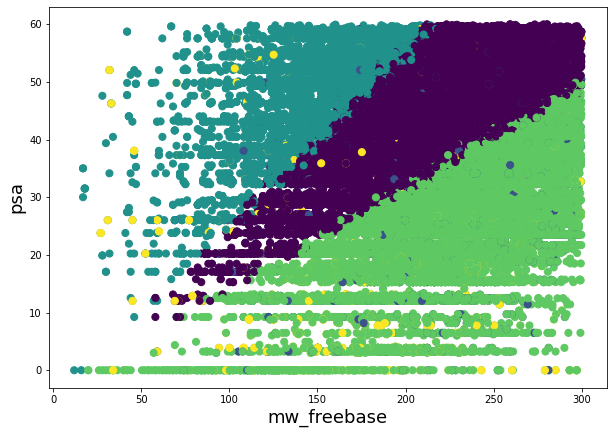

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust[['mw_freebase']], y=prep_clust.psa, c=cluster.fit(x).labels_, s=50)
plt.xlabel('mw_freebase', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

In [21]:
tab_usada['grupos_cluster_knn'] = cluster.fit(x).labels_
tab_usada.drop(["num_ro5_violations", "ro3_pass", "num_lipinski_ro5_violations"], axis=1).sort_values(by='grupos_cluster_knn')

,molregno,chembl_id,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION,grupos_cluster_knn
1191860,1363165,CHEMBL2078935,CC(C)(C)CC(C)(C)N,129.25,2.16,1.0,1.0,26.02,1.0,NaN,10.65,1.98,-0.85,129.25,0.0,9.0,0.58,129.1517,C8H19N,1.0,2.0,0,1,0,0,0
1027355,1164276,CHEMBL1806600,Cc1ccc(C)c(C(=O)/C=C/C(=O)O)c1,204.22,2.13,2.0,1.0,54.37,3.0,3.55,NaN,2.74,-0.62,204.22,1.0,15.0,0.61,204.0786,C12H12O3,3.0,1.0,1,0,0,0,0
1621846,1985524,CHEMBL3652702,NC1=N[C@@H](CC2CC2c2ccccc2)CO1,216.28,1.89,3.0,1.0,47.61,3.0,NaN,7.40,2.31,2.01,216.28,1.0,16.0,0.84,216.1263,C13H16N2O,3.0,2.0,0,0,1,0,0
490729,547956,CHEMBL544396,CCN(C)C(=O)Oc1cccc2c1CCC2N.Cl,234.30,2.08,3.0,1.0,55.56,2.0,NaN,9.41,1.72,-0.25,270.76,1.0,17.0,0.85,234.1368,C13H19ClN2O2,4.0,2.0,0,1,0,0,0
1027356,1164277,CHEMBL1806601,Cc1ccc(C(=O)/C=C/C(=O)O)cc1C,204.22,2.13,2.0,1.0,54.37,3.0,3.54,NaN,2.74,-0.62,204.22,1.0,15.0,0.61,204.0786,C12H12O3,3.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774950,869439,CHEMBL1445555,Cc1ccco1,82.10,1.59,1.0,0.0,13.14,0.0,NaN,NaN,1.31,1.31,82.10,1.0,6.0,0.46,82.0419,C5H6O,1.0,0.0,0,0,1,0,2
775281,869793,CHEMBL1445909,Cl.N=c1ccn(Cc2cccc(F)c2)cc1,202.23,2.15,2.0,1.0,28.78,2.0,NaN,11.11,2.54,-0.70,238.69,2.0,15.0,0.77,202.0906,C12H12ClFN2,2.0,1.0,0,1,0,0,2
775345,869860,CHEMBL1445976,O=C(Nc1ccccc1F)C1COc2ccccc2O1,273.26,2.60,3.0,1.0,47.56,2.0,9.35,NaN,2.75,2.75,273.26,2.0,20.0,0.91,273.0801,C15H12FNO3,4.0,1.0,0,0,1,0,2
776383,870967,CHEMBL1447083,CCCN1CCCC(c2cccc(O)c2)C1.Cl,219.33,2.98,2.0,1.0,23.47,3.0,10.28,9.20,2.67,1.10,255.79,1.0,16.0,0.84,219.1623,C14H22ClNO,2.0,1.0,0,1,0,0,2


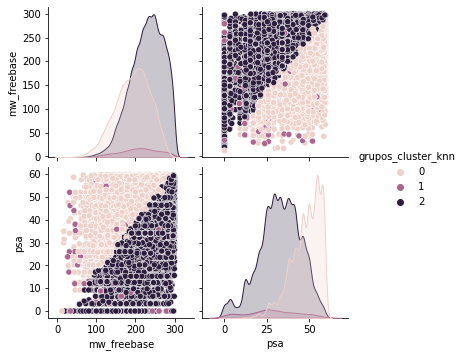

In [22]:
sns.pairplot(tab_usada[['mw_freebase', 'psa', 'grupos_cluster_knn']], hue='grupos_cluster_knn')
